# Visualisations 2D de l'OA 1s(H) / Surface d'isodensité

#### But
Utiliser des bibliothèques `python` pour étudier et représenter la caractéristique d'une orbitale à partir de représentations graphiques 2D. 

Dans ce notebook, vous allez commencer par étudier l'orbitale $1s(H)$. On comparera ses caractéristiques à celle de l'orbitale $2s(H)$.

On recherchera ensuite le rayon de la sphère (surface d'isodensité) contenant une probabilité de présence définie de l'électron de l'hydrogène.


#### Ressources

* pour intégrer numériquement: fonction `quad` du module `scipy.integrate` https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#general-integration-quad

* pour résoudre numériquement une équation: fonction `brentq` du module `scipy.optimize` 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html


#### Imports des librairies utiles et variables globales
Ne pas oublier de faire tourner cette cellule avant de lancer les cellules successives qui contiendront votre code...

In [1]:
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import scipy.integrate 
from scipy.optimize import brentq #pour utiliser directement la syntaxe brentq

a_0 = 52.9 #en pm, rayon de Bohr, variable globale    

L'expression de la fonction d'onde $\psi_{1s}=\psi_{1,0,0}(r,\theta,\phi)$ de l'OA $1s$ de l'atome H est le produit d'une fonction partie radiale et d'une fonction partie angluaire. 


$$\left\{ \begin{align} 
R_{1s}(r) = 2\, \left( \frac{1}{a_0} \right)^\tfrac{3}{2}  \exp{\left(-\frac{r}{a_0}\right)} \\
Y_{1s}(\theta,\varphi) = \frac{1}{\sqrt{4\pi}}
\end{align} \right. $$

$a_0 = 52,9\, pm$ est le **rayon de Bohr**. 

On remarquera que la fonction radiale est dimensionnée et que sa valeur dépend des unités retenues.

*Remarque* Le rayon de Bohr permet de définir l'unité de longueur atomique. Ainsi lorsque $r=a_0$, on dit qu'on se trouve à une unité atomique du noyau. Les fonctions d'onde sont fréquemment exprimée en unités atomiques, ce qui fait que les graphes que vous tracerez à partir des expressions ci-dessus n'auront pas forcément la même valeur en ordonnée que si vous travailliez avec la fonction d'onde exprimée en unité atomiques, ci-dessous. Dans ce cas, on pose:

* $r$ : rayon exprimé en unité atomique
* $Z$ : charge nucléaire, différente de 1 pour un atome hydrogénoïde
* $\rho = 2Zr/n$ où $n$ est le nombre quantique principal 

$$R_{1s} = 2 \, Z^{3/2} \, exp{\left(-\frac{\rho}{2}\right)} $$





### 1)
Dans l'espace de réponse ci-après, écrire l'expression de la fonction d'onde $\psi_{1,0,0}$. Puis écrire l'expression de la probabilité de présence de l'électron $dP$ dans un volume $dV$.

*Consigne:* éditer la cellule ci-dessous en cliquant de dessus pour éditer l'équation LateX. Vous pouvez vous inspirer de la cellule d'énoncé ci-dessus pour avoir la syntaxe/faire du copier-coller.

#### 1) Votre Réponse:
$$ \Psi_{1,0,0} = \textrm{à  compléter} $$

$$ dP = \textrm{à compléter} \, dV $$

### 2)
#### 2.a)
Définir une fonction `prob_1s` prenant en argument la coordonnée sphérique `r` et renvoyant la valeur de la densité de probabilité de présence au point considéré: $\tfrac{dP}{dV}$.

*Conseil*: préférer les fonctions de la biliothèque `numpy` plutôt que celles de `math`, qui sont plus restrictives sur le typage des variables prises en argument. Ici, vous aurez peut-être besoin de `np.square()` et `np.exp()` ...

#### 2.a) Votre réponse:

In [5]:
#Densité de probabilité de présence 1s au point (r,theta,phi)

def prob_1s(r):
    return np.square((1/a_0)**(3/2) * np.exp(-r/a_0)/np.sqrt(np.pi)) #densité de probabilité = fonction d'onde au carré

#### 2.b)
Tester votre fonction `prob_1s` en la traçant en fonction de la **distance réduite** selon la coordonnée réduite: `r/a_0`.

*Conseil*: la fonction `np.linspace()` sera utile pour créer une liste de point `r` en lesquels calculer la fonction en discrétisant les points de façon équidistante dans l'intervalle considéré.
Vous aurez aussi besoin de la fonction `plot`de la librairie `matplotlib`: `plt.plot()`

#### 2.b) Votre réponse:

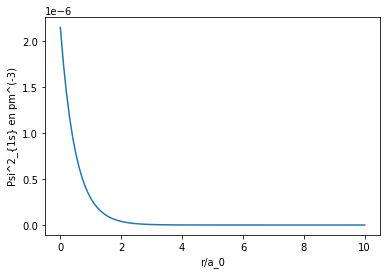

In [6]:
#Test de la fonction densité de probabilité, en pm

l_rreduit = np.linspace(0,10,100) #coordonnée réduite jusqu'à 10*a0
l_rreel = [i*a_0 for i in l_rreduit]

l_proba1s = []
for i in l_rreel:
    l_proba1s.append(prob_1s(i))
    
plt.plot(l_rreduit, l_proba1s)
plt.xlabel('r/a_0')
plt.ylabel('Psi^2_{1s} en pm^(-3)')
plt.show()

### 3)
On s'intéresse maintenant à la **densité de probabilité de présence radiale** de l'orbitale atomique $1s$, qui correspond à la probabilité de présence infinitésimale entre une sphère de rayon $r$ et une sphère de rayon $r+dr$. Celle-ci est obtenue par intégration de la densité de probabilité sur les variables angulaires, $r$ étant constant.

Cette **densité de probabilité de présence radiale** sera faible pour des $r$ petits (sphère de petite taille) et pour des $r$ grands car la partie radiale de la fonction d'onde décroit exponentiellement.

La fonction **densité de probabilité de présence radiale** s'écrit

$$DR_{1s}(r) = r^2 \times (R_{1s}(r))^2$$

#### 3.a) 
Définir une fonction `DR1s` qui renvoie pour une valeur de `r` passée en argument la valeur de la densité de probabilité radiale. On travaille en $pm^(-1)$ ($DR_{1s}(r)$ est dimensionnée).

Puis tracer la fonction `DR1s` en fonction de `r/a_0`.

#### 3.b) Votre réponse:

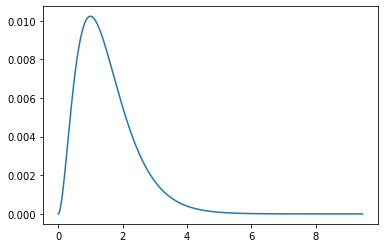

In [4]:
def DR1s(r):
    dr1s = np.square(r * 2 * (1/a_0)**(3/2) * np.exp(-r/a_0))
    return dr1s

r = np.linspace(0,500,1000) #en pm

plt.plot(r/a_0,DR1s(r))
plt.show()



#### 3.c) Ecrire vos commentaires sur la courbe:

*Consigne*: cliquer sur cette cellule pour l'éditer

### 4)

On souhaite à présent connaître la probabilité de présence de l'électron entre deux rayons, $r_1$ et $r_2$.

Ecrire une fonction `intdr` prenant comme argument une fonction `DR` ainsi que deux valeurs de distance radiale `r1` et `r2` ($r_1 < r_2$, on ne prévoit pas de tester, faisant confiance à l'utilisateur). Cette fonction renvoie la valeur de la probabilité de présence entre $r_1$ et $r_2$.

Puis vérifier la normalisation de la partie radiale de votre fonction d'onde.

*Consigne*: utiliser la fonction **quad** du module **scipy.integrate** https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#general-integration-quad

`quad` renvoie une liste de deux valeurs: la valeur numérique de l'intégrale et l'erreur estimée sur le résultat.

`np.inf` peut vous être utile pour vérifier la normalisation.

#### 4) Votre réponse

In [5]:


def intdr(f,a,b):
    return scipy.integrate.quad(f, a, b)

print(intdr(DR1s,0,np.inf)) #test de normalisation, P=1 


(0.9999999999999999, 1.4681116749324755e-09)


### 5)

On souhaite enfin déterminer le rayon $R$ de la sphère qui contient une probabilité de présence de l'électron donnée. Typiquement, $P=0,95$. Il vous faut donc résoudre l'équation:

$$\int_{0}^{R} DR(r) dr = P $$

La petite difficulté est que l'inconnue $R$ solution de l'équation est dans la borne supérieure de l'intégrale.

Ecrire une fonction `tailleOA` qui prend en argument une fonction densité de probabilité de présence radiale `DR` et un scalaire `P` pour la probabilité de présence souhaitée (on fait confiance à l'utilisateur pour prendre une valeur entre $0$ et $1$, pas de test prévu) et qui renvoie la valeur du rayon `R` d'une sphère qui contient cette probabilité de présence.

*Conseil*: On peut utiliser la fonction `brentq` du module `scipy.optimize.brentq`, qui trouve le zero d'une fonction $f$ changeant de signe sur un intervalle $[a,b]$. 

Commencer donc par écrire une fonction `ftosolve` qui prend en argument un float qui est le rayon cherché, une fonction qui est la densité de probabilité de présence radiale et un float qui est la probabilité souhaitée. Cette fonction renvoie la différence entre l'intégrale calculée par scipy.integrate.quad et la probabilité souhaitée. C'est cette fontion-différence dont on va chercher le zéro.

Puis écrire la fonction `tailleOA`, sachant que `brentq` peut prendre des arguments en plus de la variable `R` pour la fonction ftosolve. Ces arguments seront entrés à l'appel de la fonction `brentq` sous la forme `args=(DR,P)`


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html

#### 5.a) Votre réponse

In [6]:
from scipy.optimize import brentq #utiliser directement brentq

def ftosolve(R,f,P):
    inte = scipy.integrate.quad(f,0,R)
    diff = inte[0] - P #quad renvoie valeur + incertitude: on ne prend que le 1er argument
    return diff

def tailleOA(DR,P):
    sol = brentq(ftosolve,0,1000,args=(DR,P))
    return sol

test = tailleOA(DR1s,0.95)

print(test,"pm")

166.523741298514 pm


#### 5.b) 
Quel est le diamètre de l'OA $1s(H)$, habituellement donnée pour $P=0.95$ ?

$$d = à\ compléter$$


### 6)
Comparer la densité de probabilité de présence radiale des OA $1s(H)$ et $2s(H)$ sur un même graphique. On donne pour l'OA $2s(H)$:

$$\left\{ \begin{align} 
R_{2s}(r) = \frac{1}{\sqrt{2}}\, {a_0}^{-\tfrac{3}{2}}\, \left(1 - \frac{r}{2\, a_0} \right) \, \exp{(-\tfrac{r}{2\, a_0})} \\
Y_{2s}(\theta,\varphi) = \frac{1}{\sqrt{4\pi}}
\end{align} \right. $$

#### 6.a) Votre réponse

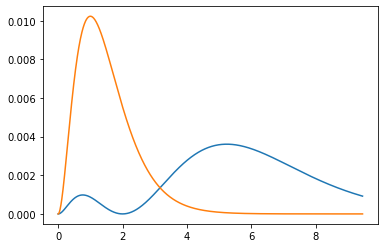

In [8]:
def DR2s(r):
    dr2s = np.square(r * (1/np.sqrt(2))* (1/a_0)**(3/2) *(1-r/(2*a_0))* np.exp(-r/(2*a_0)))
    return dr2s

r = np.linspace(0,500,1000) #en pm

plt.plot(r/a_0,DR2s(r))
plt.plot(r/a_0,DR1s(r))
plt.show()



#### 6.b) Surfaces nodales

Combien y a-t'il de surfaces nodales dans l'OA $1s$? l'OA $2s$? Généraliser pour une OA $ns$

### 7 Pour aller plus loin... l'OA représentée comme nuéage de point
#### 3.a)
On va à présent mailler l'espace. Créer trois listes avec espacement régulier pour les **coordonnées réduites** x, y et z prenant des valeurs entre 0 et 5. 
On conseille de créer un dictionnaire `proba_1s_pt` dont chaque clef est un n-uplet de points `(x,y,z)` (attention, les listes ne peuvent pas être une clef de dictionnaire car c'est un objet mutable) et dont la valeur correspondante est la densité de probabilité de présence au point.

*Conseil*: la fonction `np.linspace()` sera utile pour créer les trois listes de points. Pour création et un usage du dictionnaire, voir par exemple [https://docs.python.org/fr/3.7/tutorial/datastructures.html?highlight=dictionnaire#dictionaries]

#### 3.a) Votre réponse:

In [14]:
#Création des listes de coordonnées
listx = np.linspace(0,5,50)
listy = np.linspace(0,5,50)
listz = np.linspace(0,5,50)

#creation d'un dictionnaire avec comme clef un triplet (n-uplet) de coordonnées
proba_1s_pt = {}
for x in listx:
    for y in listy:
        for z in listz:
            proba_1s_pt[(x,y,z)] = prob_1s(x,y,z)
            


#### 3.b)
On souhaite terminer en faisant une représentation 3D dans laquelle la densité de points sera d'autant plus importante que la densité de probabilité est importante. 
Pour ce faire, on va sélectionner des triplets de points `x,y,z` à tracer de façon aléatoire, selon la valeur de la densité de probabilité en ces points. On peut par exemple utiliser la fonction `np.random.choice` dans laquelle la probabilité de choix du triplet de point (argument `p`) vaudra la densité de probabilité de présence en ce point.

Analyser le code ci-dessous


#### 3.b) Votre réponse:

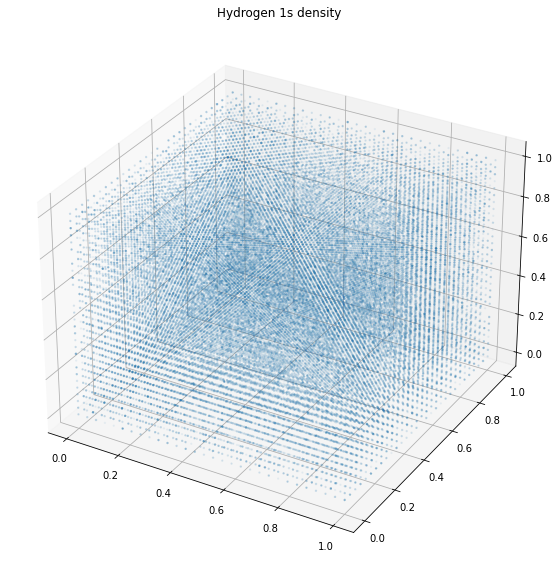

In [16]:
#Random coordinates https://towardsdatascience.com/quantum-physics-visualization-with-python-35df8b365ff
x=np.linspace(0,1,30)
y=np.linspace(0,1,30)
z=np.linspace(0,1,30)
elements = []
probability = []
for ix in x:
    for iy in y:
        for iz in z:
            #Serialize into 1D object
            elements.append(str((ix,iy,iz)))
            probability.append(prob_1s(ix,iy,iz))
            
#Ensure sum of probability is 1
probability = probability/sum(probability)
#Getting electron coordinates based on probabiliy
coord = np.random.choice(elements, size=100000, replace=True, p=probability)
elem_mat = [i.split(',') for i in coord]
elem_mat = np.matrix(elem_mat)
x_coords = [float(i.item()[1:]) for i in elem_mat[:,0]] 
y_coords = [float(i.item()) for i in elem_mat[:,1]] 
z_coords = [float(i.item()[0:-1]) for i in elem_mat[:,2]]
#Plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, alpha=0.05, s=2)
ax.set_title("Hydrogen 1s density")
plt.show()

#### 4.b)
La partie radiale de l'OA $2s$ est:

$$R_{2s}(r) = \frac{1}{\sqrt{2}}\, {a_0}^{-\tfrac{3}{2}}\, \left(1 - \frac{r}{2\, a_0} \right) \, \exp{(-\tfrac{r}{2\, a_0})}$$

Faire un tracé superposant $DR_{1s}$ et $DR_{2s}$.



#### 4.b) Votre réponse:

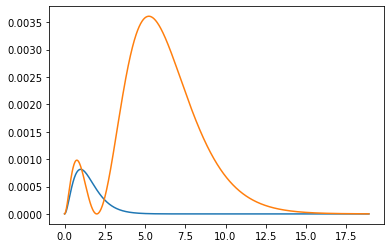

In [17]:
def DR2s(r):
    dr2s = np.square( r * (1 - r/(2*a_0)) * np.exp(- r/(2*a_0)) /(np.sqrt(2) * a_0**(3/2)))
    return dr2s

r = np.linspace(0,1000,1000)
for DR in [DR1s,DR2s]:
    y = DR(r)
    plt.plot(r/a_0,y)
    
plt.show()


### 5) 
Observation: code permettant la représentation 3D de la **partie angulaire** fonctions d'onde $1s$ et $2s$.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

phi,theta = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
r = 1/np.sqrt(4*np.pi)
x = r*np.cos(phi)*np.sin(theta)
y = r*np.sin(phi)*np.sin(theta)
z = r*np.cos(theta)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z)
plt.show()


## Exercice 2: Forme des OA 2p

On donne les expressions des parties radiales et angulaires des OA $2p_x$, $2p_y$ et $2p_z$.

$$R_{2p_x}(r)= R_{2p_y}(r) = R_{2p_z}(r) = \frac{1}{2\, \sqrt{6}} {a_0}^{-\frac{3}{2}}  \left(\frac{r}{a_0}\right) \exp \left( -\frac{r}{2\, a_0} \right)  $$

$$ Y_{2p_x}(r) = \sqrt{\frac{3}{4\pi}} \sin\theta \cos\varphi $$
$$ Y_{2p_y}(r) = \sqrt{\frac{3}{4\pi}} \sin\theta \sin \varphi $$
$$ Y_{2p_z}(r) = \sqrt{\frac{3}{4\pi}} \cos \theta$$

### 1) 
Donner les équations de correspondance entre les coordonnées cartésiennes $x,y,z$ et les coordonnées sphériques $r,\theta,\varphi$. 

En déduire l'origine des l'appellations $2p_x$, $2p_y$ et $2p_z$.


### 2)
On souhaite représenter la partie angulaire de la partie angulaire $Y_{2p_z}(\theta,\varphi)$ dans le plan $\varphi = 0$. Il s'agit donc de tracer une courbe en coordonnées polaires dans le plan cartésien $xOz$.

Exécuter le code ci-dessous. Qu'observez-vous?

In [ ]:
import  matplotlib.pyplot  as  plt
import scipy.integrate
import  scipy.optimize
import  numpy  as  np
import  math
%matplotlib inline
from matplotlib.projections import PolarAxes

def R_21 (r):
    radial =  (4/(81*math.sqrt(30))) * a_0**(-7/2) \
    * (r**2) * np.exp(-r/(3*a_0))
    return radial

def Y_1z (theta):
    angulaire = math.sqrt(3/(4 * math.pi)) * np.cos(theta)
    return angulaire

fig = plt.figure()
step      = 1
theta     = [t * math.pi / 180 for t in range(0,360,step)]
Y_1zvalues = [math.fabs(Y_1z(t)) for t in theta]
plt.polar(theta, Y_1zvalues)
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Partie angulaire 2pz')
plt.show()

### 3)

En vous appuyant sur le code de la dernière question de l'exercice 1, représenter la partie angulaire $Y_{2p_z}(\theta,\varphi)$ en 3D.

In [ ]:
#votre code ...